In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
cd "/content/gdrive/My Drive/Pics"

/content/gdrive/My Drive/Pics


In [ ]:
!pwd

/content/gdrive/My Drive/Pics


In [ ]:
pip install face_recognition

     |████████████████████████████████| 100.2MB 42kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=f69d2bf03b9cd9ae596b40beda00c2e60d180ebebe1374510d86a300e66504ee
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


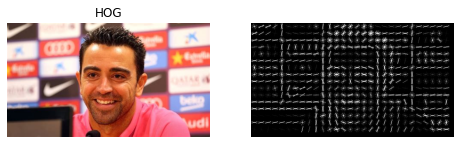

In [ ]:
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import data,feature
import cv2
from skimage import exposure
from google.colab.patches import cv2_imshow

image = cv2.imread('xavi_1.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

fd, hog_image = hog(image, orientations=8,pixels_per_cell=(16,16),
                    cells_per_block=(1,1),visualize = True, multichannel=True)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,4),sharex=True,sharey=True)

ax1.axis('off')
ax1.imshow(image,cmap=plt.cm.gray)
ax1.set_title('Input Image')

hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0,10))
ax2.axis('off')
ax2.imshow(hog_image_rescaled,cmap=plt.cm.gray)
ax1.set_title('HOG')
plt.show()

In [ ]:
len(fd)

3712

In [ ]:
image.shape

(266, 474, 3)

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
import numpy as np
import face_recognition
import cv2
%matplotlib inline

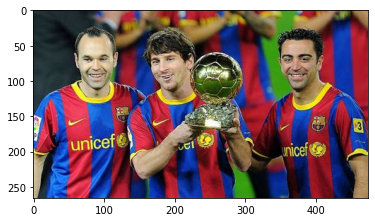

In [ ]:
image = cv2.imread('tri.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [ ]:
face_locations = face_recognition.face_locations(image)
number_of_faces = len(face_locations)
print(number_of_faces)

3


A face is located at pixel location Top: 53,Left: 405,Bottom: 115,Right: 342
A face is located at pixel location Top: 55,Left: 112,Bottom: 107,Right: 60
A face is located at pixel location Top: 55,Left: 210,Bottom: 107,Right: 158


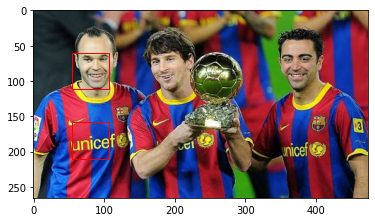

In [ ]:
plt.imshow(image)
ax = plt.gca()

for face_location in face_locations:
  top,right,bottom,left = face_location
  x,y,w,h = top,right,bottom,left
  print("A face is located at pixel location Top: {},Left: {},Bottom: {},Right: {}".format(x,y,w,h))

  rect = Rectangle((x,y),w-x,h-y,fill = False,color='red')
  ax.add_patch(rect)
plt.show()  

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
import numpy as np
import face_recognition
import cv2
%matplotlib inline

In [ ]:
image = cv2.imread('iniesta_1.jpg')
iniesta = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image = cv2.imread('messi_1.jpg')
messi = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image = cv2.imread('xavi_1.jpg')
xavi = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [ ]:
iniesta_encoding = face_recognition.face_encodings(iniesta)[0]
messi_encoding = face_recognition.face_encodings(messi)[0]
xavi_encoding = face_recognition.face_encodings(xavi)[0]

known_face_encodings = [
              iniesta_encoding,
              messi_encoding,
              xavi_encoding          
]

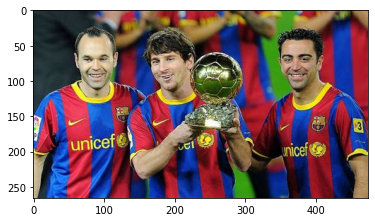

In [ ]:
image = cv2.imread('tri.jpg')
unknown_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(unknown_image)

unknown_face_encodings = face_recognition.face_encodings(unknown_image)

In [ ]:
from scipy.spatial import distance

for unknown_face_encoding in unknown_face_encodings:
  
  results = []
  for known_face_encoding in known_face_encodings:
    d = distance.euclidean(known_face_encoding,unknown_face_encoding)
    results.append(d)
    threshold = 0.6
  results = np.array(results) <= threshold
  
  name = "Unknown"

  if results[0]:
    name = "Iniesta"
  elif results[1]:
    name = "Messi"
  elif results[2]:
    name = "Xavi"

  print(f"Found {name} in the Photo!")      


Found Xavi in the Photo!
Found Iniesta in the Photo!
Found Messi in the Photo!
